In [6]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [7]:
print(sys.prefix)

/Users/tsegazabtesfay/opt/anaconda3/envs/SIDR


In [8]:
pwd

'/Users/tsegazabtesfay/Desktop/For_SDIR/AISprediction'

In [9]:
ls

AIS_2019_01_01.csv  Procfile            app.py              templates/
Model.pkl           SDIR.ipynb          requirements.txt


In [10]:
dataframe = pd.read_csv("AIS_2019_01_01.csv")

In [11]:
len(dataframe)

7509648

In [12]:
dataframe.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,338208626,2019-01-01T00:00:05,37.86505,-122.31405,0.0,-165.0,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,B
1,367420490,2019-01-01T00:00:04,31.26095,-91.65160,4.5,15.0,31.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,B
2,338060122,2019-01-01T00:00:04,30.67109,-81.46722,1.9,-67.4,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,B
3,368018190,2019-01-01T00:00:04,30.70736,-88.04332,0.0,-103.6,301.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,B
4,368039230,2019-01-01T00:00:04,35.08305,-90.14214,0.0,-182.3,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,B


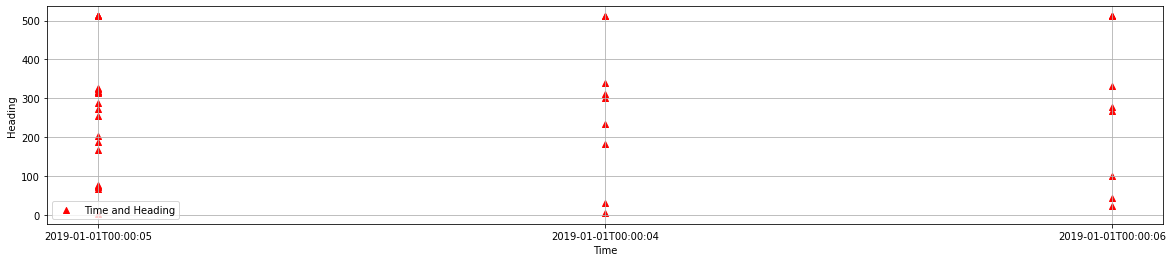

In [68]:
# See the time and heading for 50
fig = plt.figure(figsize=(20,4))
plt.scatter(dataframe["BaseDateTime"][:50], dataframe["Heading"][:50], label="Time and Heading", marker="^", color = "red")
plt.xlabel("Time")
plt.ylabel("Heading")
plt.grid()
plt.legend()
plt.show()

#### Here I want to see which top 10 vessels with large amount of Cargo 

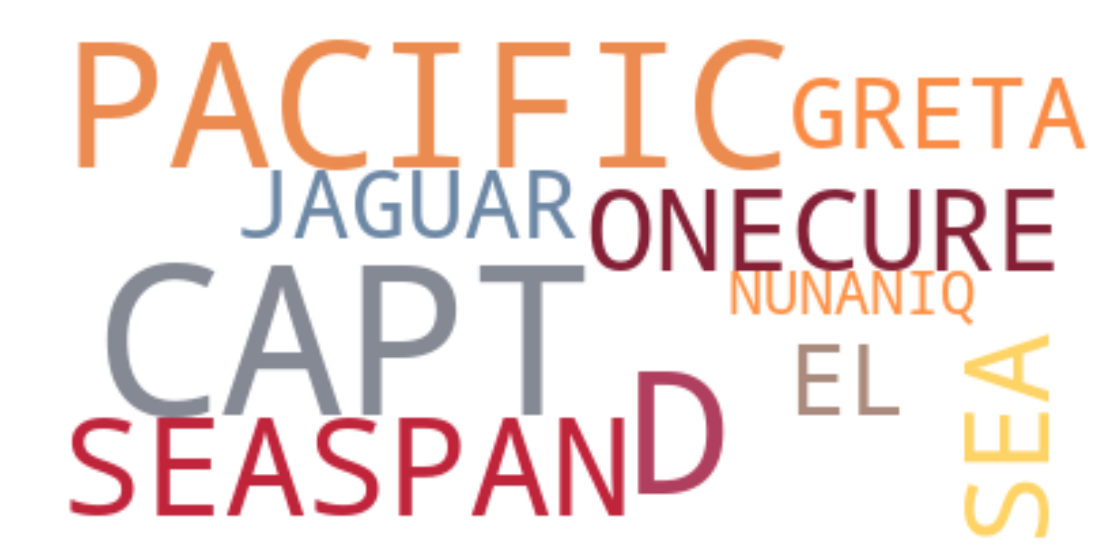

In [89]:

hero.visualization.wordcloud(dataframe["VesselName"].where(dataframe["Cargo"] > 90), max_words=10,background_color="white")

In [13]:
dataframe.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
count,7.509648e+06,7.509648e+06,7.509648e+06,7.509648e+06,7.509648e+06,7.509648e+06,7.039789e+06,6.100040e+06,6.557479e+06,5.504226e+06,1.959708e+06,2.530337e+06
mean,3.677327e+08,3.528047e+01,-9.584478e+01,1.850448e+00,-2.518261e+01,3.663924e+02,4.376085e+01,4.060578e+00,4.999170e+01,1.158958e+01,6.497786e+00,4.752748e+01
std,5.702017e+07,8.291257e+00,2.011628e+01,3.957488e+00,1.223318e+02,1.789334e+02,2.000086e+01,5.788943e+00,6.583975e+01,9.411676e+00,4.351667e+00,2.246778e+01
min,0.000000e+00,6.667000e-02,-1.769794e+02,-5.110000e+01,-2.048000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.250000e+01,0.000000e+00
25%,3.669410e+08,2.961308e+01,-9.706968e+01,0.000000e+00,-1.316000e+02,2.100000e+02,3.100000e+01,0.000000e+00,1.800000e+01,7.000000e+00,3.400000e+00,3.100000e+01
50%,3.673688e+08,3.265800e+01,-9.025550e+01,0.000000e+00,-4.960000e+01,5.110000e+02,3.100000e+01,0.000000e+00,2.500000e+01,9.000000e+00,4.700000e+00,5.200000e+01
75%,3.676698e+08,4.054473e+01,-8.143746e+01,6.000000e-01,8.140000e+01,5.110000e+02,6.000000e+01,5.000000e+00,4.100000e+01,1.200000e+01,9.800000e+00,6.000000e+01
max,1.000000e+09,7.049377e+01,-6.087994e+01,5.080000e+01,2.047000e+02,5.110000e+02,1.700000e+02,1.500000e+01,3.970000e+02,1.260000e+02,2.410000e+01,1.700000e+02


In [14]:
df = dataframe
print("Tot rows: ".upper(), len(df))
print("possible data input from AIS: ".upper())
for i in range(len(df.columns)):
    print(i+1, df.columns[i])

TOT ROWS:  7509648
POSSIBLE DATA INPUT FROM AIS: 
1 MMSI
2 BaseDateTime
3 LAT
4 LON
5 SOG
6 COG
7 Heading
8 VesselName
9 IMO
10 CallSign
11 VesselType
12 Status
13 Length
14 Width
15 Draft
16 Cargo
17 TranscieverClass


In [15]:
# features I want to use
# MMSI: Maritime Mobile Service Identity
# LAT: latitude
# LON: longutid
# SOG: Speed over ground
# COG: Course Over Ground
df = df[["MMSI", "LAT", "LON", "SOG", "COG", "Heading", "VesselName", "VesselType", "Length", "Width", "Cargo"]]

In [16]:
df.head()

,MMSI,LAT,LON,SOG,COG,Heading,VesselName,VesselType,Length,Width,Cargo
0,338208626,37.86505,-122.31405,0.0,-165.0,511.0,NaN,NaN,NaN,NaN,NaN
1,367420490,31.26095,-91.65160,4.5,15.0,31.0,NaN,NaN,NaN,NaN,NaN
2,338060122,30.67109,-81.46722,1.9,-67.4,511.0,NaN,NaN,NaN,NaN,NaN
3,368018190,30.70736,-88.04332,0.0,-103.6,301.0,NaN,NaN,NaN,NaN,NaN
4,368039230,35.08305,-90.14214,0.0,-182.3,4.0,NaN,NaN,NaN,NaN,NaN


In [17]:
c = 0
for i in range(len(df)):
    if df["Heading"][i] == 511: #accordaing to the source 511 means “not available"
        c += 1
print("From our data, I can see that there are %d unavailble." %c)
# duplicates
df2 = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:"Records"})
print("Without any dublicates, there are %s rows." % len(df2))

From our data, I can see that there are 4231814 unavailble.
Without any dublicates, there are 2216860 rows.


In [18]:
df2.head()

,MMSI,LAT,LON,SOG,COG,Heading,VesselName,VesselType,Length,Width,Cargo,Records
0,527918,40.68632,-74.07780,0.0,89.7,228.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
1,527918,40.68633,-74.07780,0.0,89.7,229.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
2,527918,40.68634,-74.07783,0.0,89.7,222.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
3,527918,40.68634,-74.07783,0.0,89.7,224.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
4,527918,40.68634,-74.07783,0.0,89.7,225.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1


In [19]:
# here I just want to see how the data looks like in randomly chosen index
df2[df2.columns].iloc[300:310]

,MMSI,LAT,LON,SOG,COG,Heading,VesselName,VesselType,Length,Width,Cargo,Records
300,527918,40.68639,-74.07781,0.0,-87.6,231.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
301,527918,40.68639,-74.07781,0.0,89.7,222.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
302,527918,40.68639,-74.07781,0.0,89.7,223.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,2
303,527918,40.68639,-74.07781,0.0,89.7,224.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
304,527918,40.68639,-74.07781,0.0,89.7,225.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,2
305,527918,40.68639,-74.07781,0.0,89.7,226.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,3
306,527918,40.68639,-74.07781,0.0,89.7,227.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,3
307,527918,40.68639,-74.07781,0.0,89.7,228.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,2
308,527918,40.68639,-74.07781,0.0,89.7,231.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1
309,527918,40.68639,-74.07780,0.0,-87.6,230.0,SALVAGE MASTER,30.0,0.0,0.0,30.0,1


In [85]:
import texthero as hero

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
hero.visualization.wordcloud(df2["VesselName"].where(df2["Cargo"] > 70), max_words=30,background_color="white")

KeyError: 'VesselName'

In [80]:
print(max(df2["Cargo"][:]))

132.0


In [20]:
# check if there is any NaN
df2.iloc[:].isnull().values.any()

False

In [21]:
# create duplicate checker
records_counter_for1 = 0
records_counter_for2 = 0
records_counter_for3 = 0
records_counter_for_above3 = 0

for i in range(len(df2)):
    if df2["Records"][i] == 1:
        records_counter_for1 += 1
    elif df2["Records"][i] == 2:
        records_counter_for2 += 1
    elif df2["Records"][i] == 3:
        records_counter_for3 += 1
    else:
        records_counter_for_above3 += 1
print("records".upper())
print("Out of this one can get a generall idea the movement of vessels")
print(records_counter_for1, records_counter_for2, records_counter_for3, records_counter_for_above3)

RECORDS
Out of this one can get a generall idea the movement of vessels
2163705 27778 8094 17283


In [22]:
df2 = df2.drop(["VesselName"],axis=1)

In [23]:
df2 = pd.get_dummies(df2, drop_first=True)

In [24]:
df2.head()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Length,Width,Cargo,Records
0,527918,40.68632,-74.07780,0.0,89.7,228.0,30.0,0.0,0.0,30.0,1
1,527918,40.68633,-74.07780,0.0,89.7,229.0,30.0,0.0,0.0,30.0,1
2,527918,40.68634,-74.07783,0.0,89.7,222.0,30.0,0.0,0.0,30.0,1
3,527918,40.68634,-74.07783,0.0,89.7,224.0,30.0,0.0,0.0,30.0,1
4,527918,40.68634,-74.07783,0.0,89.7,225.0,30.0,0.0,0.0,30.0,1


In [25]:
df2.corr()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Length,Width,Cargo,Records
MMSI,1.000000,-0.083938,0.051970,0.087256,0.031727,-0.087318,0.157961,0.243704,0.250676,0.148018,-0.001800
LAT,-0.083938,1.000000,-0.537669,-0.036052,-0.010438,-0.026053,-0.113283,-0.014801,-0.047168,-0.094594,-0.002212
LON,0.051970,-0.537669,1.000000,-0.001628,0.018888,0.022002,0.043048,-0.019610,-0.010087,0.072312,0.000572
SOG,0.087256,-0.036052,-0.001628,1.000000,0.131319,-0.212681,0.237108,0.406404,0.358101,0.217535,-0.016960
COG,0.031727,-0.010438,0.018888,0.131319,1.000000,-0.104935,0.060651,0.094013,0.091233,0.064884,0.003599
Heading,-0.087318,-0.026053,0.022002,-0.212681,-0.104935,1.000000,-0.219641,-0.400715,-0.405029,-0.213841,-0.009425
VesselType,0.157961,-0.113283,0.043048,0.237108,0.060651,-0.219641,1.000000,0.590158,0.572602,0.581054,0.007253
Length,0.243704,-0.014801,-0.019610,0.406404,0.094013,-0.400715,0.590158,1.000000,0.927508,0.496944,0.004799
Width,0.250676,-0.047168,-0.010087,0.358101,0.091233,-0.405029,0.572602,0.927508,1.000000,0.489353,0.004660
Cargo,0.148018,-0.094594,0.072312,0.217535,0.064884,-0.213841,0.581054,0.496944,0.489353,1.000000,0.002880


The more closer to the green color the more features are correlated


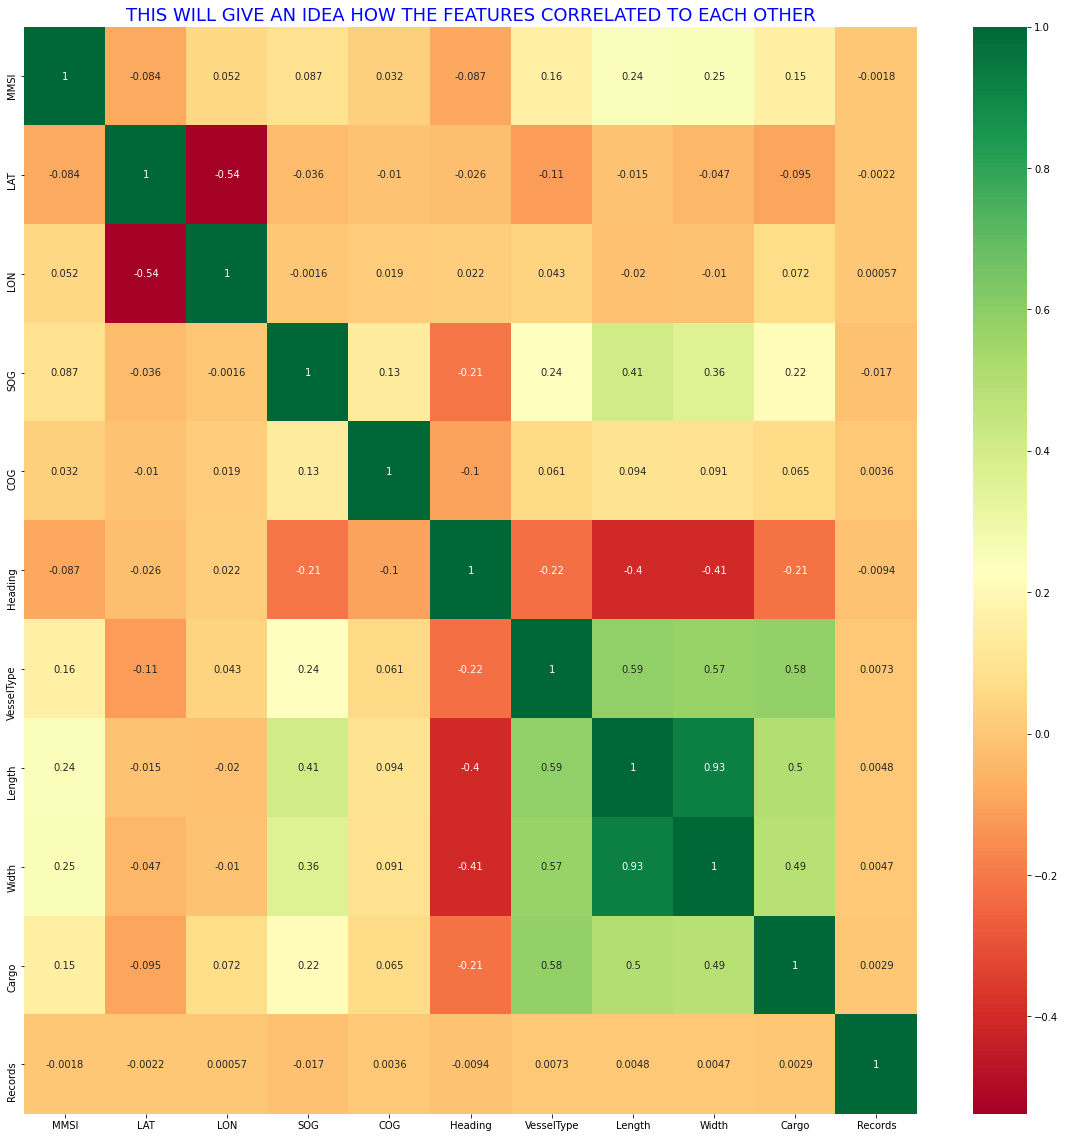

In [26]:
#geting correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
plt.title("This will give an idea how the features correlated to each other".upper(), size=18, color="blue")
g = sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print("The more closer to the green color the more features are correlated") ###

In [27]:
df2.head()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Length,Width,Cargo,Records
0,527918,40.68632,-74.07780,0.0,89.7,228.0,30.0,0.0,0.0,30.0,1
1,527918,40.68633,-74.07780,0.0,89.7,229.0,30.0,0.0,0.0,30.0,1
2,527918,40.68634,-74.07783,0.0,89.7,222.0,30.0,0.0,0.0,30.0,1
3,527918,40.68634,-74.07783,0.0,89.7,224.0,30.0,0.0,0.0,30.0,1
4,527918,40.68634,-74.07783,0.0,89.7,225.0,30.0,0.0,0.0,30.0,1


In [28]:
df2 = df2[["Heading", "MMSI", "LAT", "LON", "SOG", "COG", "VesselType", "Length", "Width", "Cargo"]]


In [29]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [30]:
### here I would like to feature Importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.13665364 0.11585902 0.13488292 0.0358996  0.04246061 0.05483715
 0.25718166 0.13634338 0.08588202]


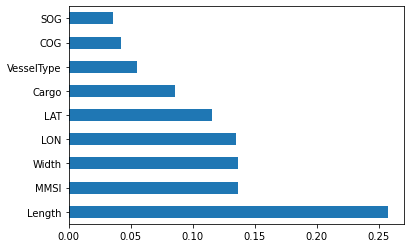

In [32]:
# Here I want to show the features importances with visualization
n = len(df2.columns)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(n).plot(kind="barh")
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
max_depth

[5, 10]

#### NB. I didn't use the cell below during training my model since it took too long run each epoch. It could give a good result because of searchCV. One could also use greedysearch to know the min and max accuracy


In [35]:
#Randomized Search CV
# Number of trees in random forest
regressor = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}
#print(random_grid)
#rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
#rf_random.fit(X_train,y_train) took long to run


In [36]:
r = RandomForestRegressor(max_depth=2, random_state=0)
r.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [37]:
pred = r.predict(X_test)

#### In the figures below, one can easily see that the model did not trained well. This is because the amount of data is quite large to a normal PC, which only runs on CPU

/Users/tsegazabtesfay/opt/anaconda3/envs/SIDR/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heading', ylabel='Density'>

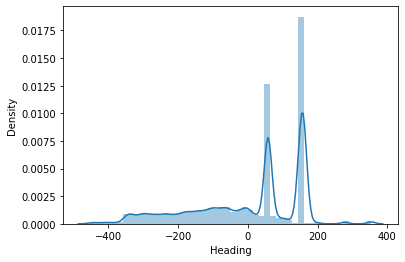

In [38]:
sns.distplot(y_test-pred)

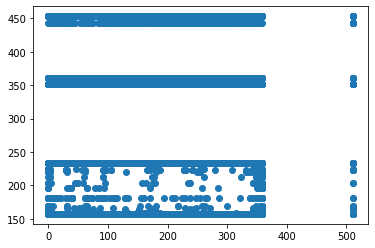

In [39]:
plt.scatter(y_test,pred)

#### saving my model, name = Model.pkl

In [40]:
import pickle
file = open("Model.pkl", "wb")
pickle.dump(r, file)